# Likelihoods with Sigmoid Neuron

## Introduction

In the last lesson we saw how we can represent the hypothesis function of a perceptron as a plot.  As we know, a a perceptron takes in inputs and then, based on these inputs either fires or does not fire, which represent by outputting a value of 1 or 0.

<img src="https://storage.cloud.google.com/curriculum-assets/nn-from-scratch/neuron-general-2.png" width="50%">

Graphically, we represent the firing or not firing by drawing a line through our data.

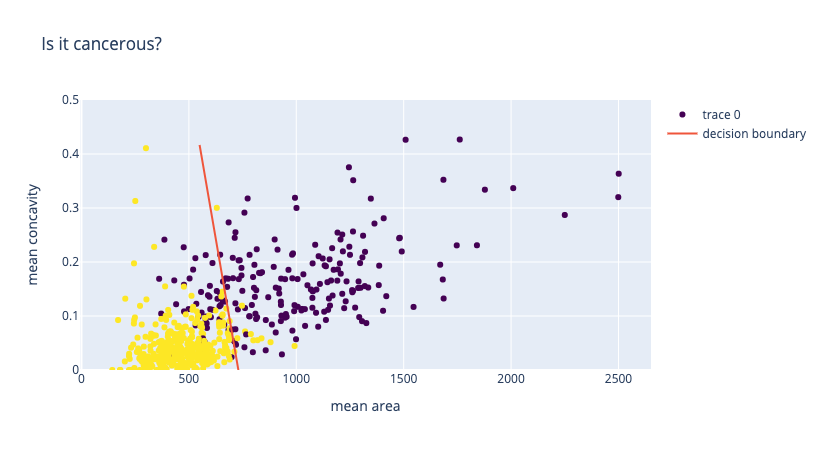

In [4]:
import pandas as pd
import plotly.graph_objects as go
cancer_json = "https://storage.googleapis.com/curriculum-assets/nn-from-scratch/cancer_logistic.json"
fig_dict = dict(pd.read_json(cancer_json, typ = 'dict'))
go.Figure(fig_dict)

We call that line our decision boundary, and it represents the boundary between our perceptron predicting one value or the other.  From there, we saw that we can express the confidence in our prediction by having our hypothesis function return the weighted sum.

In [8]:
def perceptron(x_1, x_2):
    weighted_sum = -0.00802333*x_1 +  -3.47361781*x_2 + 5.86
    return weighted_sum

We can see that the smaller the weighted sum, the closer to the decision boundary we are, and thus the lesson confident we are in our prediction.

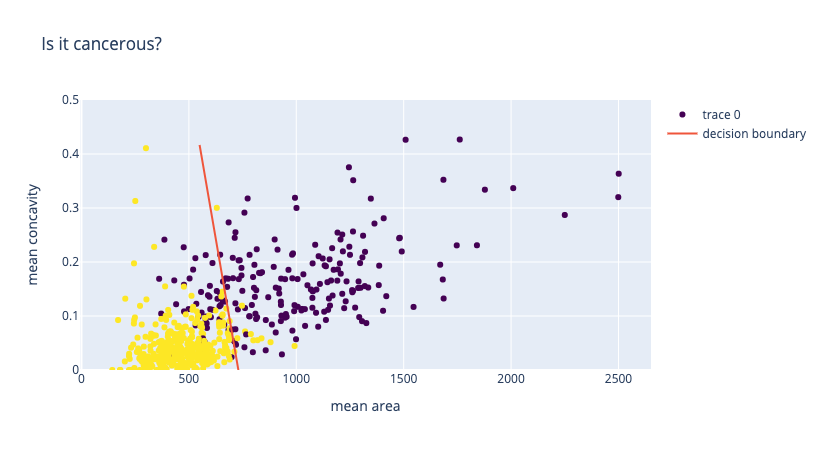

In [5]:
weighted_sums_json = "https://storage.googleapis.com/curriculum-assets/nn-from-scratch/weighted_sum_cancer.json"
weighted_dict = dict(pd.read_json(weighted_sums_json, typ = 'dict'))
go.Figure(weighted_dict)

## From confidence to probabilities

Our code is currently looking quite good, so it's time to add a new feature.  Instead of returning a number between positive and negative infinity, let's change our function so we return a number between just 1 and 0 based on the strength of our conviction.  So for example, if we were confident in a prediction of 1, where we previously returned a large positive number, we would now return a number close to 1 (like .98).  And instead of returning a large negative number for observations we are confident are a 0, we now return a number close to 0, like .02.

To accomplish this, we'll make use of the sigmoid function.  This is the sigmoid function.

$\sigma(x) = \frac{1}{1 + e^{-x}} $

The sigmoid function is generally represented by the Greek letter, $\sigma$, and as we'll see, it accomplishes what we want.  It brings large positive numbers close to 1, and large negative numbers close to 0.  Let's see about why.

### Introducing the sigmoid function

Ok, so this is our sigmoid function.

$\sigma(x) = \frac{1}{1 + e^{-x}} $

> Let's think about what this function does.  

When $x$ is a large positive number, say $1,000$, we have:

* $\sigma(-1000) = \frac{1}{1 + e^{-1000}} = \frac{1}{1 + 1/e^{1000}}  = \frac{1}{1 + small\_num} \approx 1$

And when $x$ is a large negative number, we have: 

* $\sigma(1000) = \frac{1}{1 + e^{1000}} = \frac{1}{1 + e^{1000}}  = \frac{1}{1 + big\_num} \approx 0$

Finally, when $x = 0$ we have: 

* $\sigma(0) = \frac{1}{1 + e^{0}} = \frac{1}{1 + 1} = \frac{1}{2}$ 

We can also see this by translating the sigmoid function into code an plugging in a few values.

In [5]:
import numpy as np
def sigmoid(value):
    return 1/(1 + np.exp(-value))

In [6]:
sigmoid(-7)
# 0.000911

sigmoid(7)
# 0.9990

sigmoid(0)
# 0.5

0.5

So our sigmoid function takes values between positive and negative infinity and plots those numbers between 0 and 1.  

> And now we can feed our previous output from our neuron into our sigmoid function.

In [11]:
x_1 = 1001.0
x_2 = 0.3001
sigmoid(perceptron(x_1, x_2))

0.03865021315826872

Let's plot our graph of breast cancer data again, this time with the outputs from our sigmoid neuron.

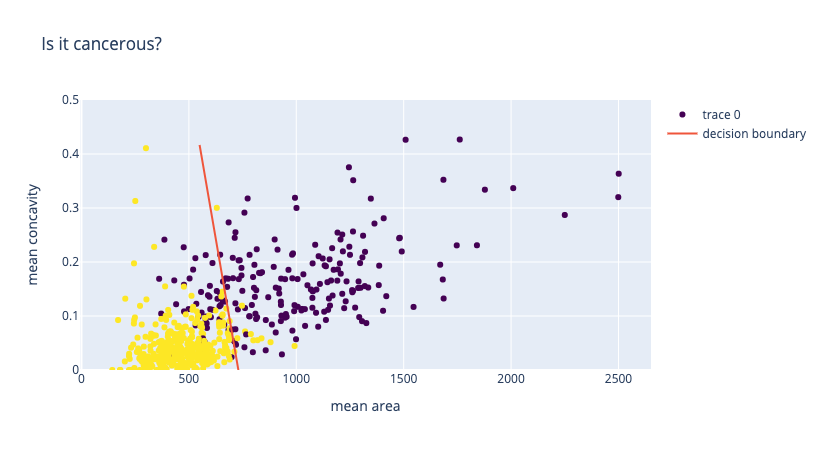

In [7]:
import pandas as pd
probs_json = "https://storage.googleapis.com/curriculum-assets/nn-from-scratch/cancerous_probs.json"
weighted_dict = dict(pd.read_json(probs_json, typ = 'dict'))
go.Figure(weighted_dict)

So remember that the decision boundary represents the point where we are unsure between a prediction one way or the other.  And notice that the closer the points are to the decision boundary, the closer the score is to .5 -- representing a .5 probability of cancer being present.  The further the points are to the left, the closer the scores are to 1, and the further points are to the right the closer they are to 0.

### A couple of terms

Let's take a moment to describe what we have arrived at.  We have built a **sigmoid neuron**. 

> A sigmoid neuron takes multiple inputs and uses the sigmoid function to return a number between 0 and 1.

Our sigmoid neuron consists of two components:
1. a linear function (consisting of the weighted sum and bias), whose output is passed into
2. a non-linear function (sigmoid).  

> A **linear function** is any function where each of the variables are raised to the term 1 or 0.

Looking our perceptron we see that this qualifies as a linear function as no term is raised to an exponent other than 1 or 0: 

$f(x) = w_1x_1 + w_2x_2 + b $

In [15]:
def perceptron(x_1, x_2):
    weighted_sum = -0.00802333*x_1 +  -3.47361781*x_2 + 5.86
    return weighted_sum

Then we pass this output into a **non-linear function**.  Here that **non-linear function** is the sigmoid function.    

$S(x) = \frac{1}{1 + e^{-x}} $

This non-linear function, is also called the neuron's **activation function**.  We call it the activation function because it determines the degree to which our neuron will fire.  Or according to Wikipedia:

> An **activation function** defines the output of that neuron given an input or set of inputs

So to summarize, our sigmoid neuron is a linear function wrapped in a sigmoid function: 

In [16]:
x_1 = 1001.0
x_2 = 0.3001
sigmoid(perceptron(x_1, x_2))

0.03865021315826872

Or to write it mathematically: 

$\sigma(z(x)) =  \frac{1}{1 + e^{-f(x)}} $

where $z(x) = w_1x_1 + w_2x_2 ... w_nx_n + b $

This is the hypothesis function of our sigmoid neuron.

### Wrapping up

We have now made it to the final form of our neuron's hypothesis function.  Our artificial neuron takes in weighted inputs and now returns a value between 1 and 0.  A value of .5 means that the artificial neuron is not making a prediction one way or the other. 

We calculate the hypothesis function in two steps: 

1. A weighted sum, which represent as `z` 
2. Passing that weighted sum to our sigmoid function

So for an artificial neuron that takes in two inputs, we calculate the output with the following:

$z = w_1x_1 + w_2x_2 + b$

$ \sigma(z) = \frac{1}{1 + e^{-z}} $

With this hypothesis function we have graduated from the perceptron to the sigmoid neuron, as we now use the sigmoid function to return values between 0 and 1.

### Summary

In this lesson we were introduced to the hypothesis function for the sigmoid neuron.  We saw that the hypothesis function for the sigmoid neuron consists of two steps:

1. A weighted sum: $z = w_1x_1 + w_2x_2 + ... w_nx_n $
2. Passed to the sigmoid function: $ \sigma(z) = \frac{1}{1 + e^{-z}} $

Using the sigmoid function allows us to take in various inputs make predictions as a probability.  The sigmoid neuron expresses confidence in it's predictions by returning values close to 0 or 1.  If not confident one way or the other, the sigmoid neuron returns a value close to $.5$.

### Resources

[logistic regression cost](https://www.internalpointers.com/post/cost-function-logistic-regression)

[For analogy of neuron to judge](http://neuralnetworksanddeeplearning.com/chap1.html)